In [1]:
import sys
import os
sys.path.append("/mnt/brain5/scratch/wcarvalh/projects/rljax/")
print("Started")

Started


In [2]:
from IPython.display import display, HTML

from vistools.tensorboard_data import TensorboardData
from vistools.tensorboard_vistools import Vistool, PanelTool


%matplotlib inline
%load_ext autoreload
%autoreload 2

/home/wcarvalh/miniconda3/envs/acmejax/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
basepath="/mnt/brain5/scratch/wcarvalh/projects/rljax/results/msf/refactor/"

run_data = TensorboardData(
    search_paths=None,
    search_kwargs=dict(
        basepath=basepath,

        njobs=1,
        verbose=1,
    )
)

In [4]:
run_data.load_paths(
    search_paths=[
        # e.g. goto_avoid/settings/seed
        "2022.03.27/*/*",
    ],
    config_file='config.json',
)
run_data.load_settings(config_search='config.json')

print(len(run_data.settings_df))
run_data.settings_df.head()

get_runs: /mnt/brain5/scratch/wcarvalh/projects/rljax/results/msf/refactor/2022.03.27/*/*


/mnt/brain5/scratch/wcarvalh/projects/rljax/results/msf/refactor/2022.03.27/*/*: 4


loaded: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 27413.75it/s]

Added: 4
4


,path,fullpath,experiment_settings,experiment_settings_seed,value_coeff,replay_table_name,seed,variable_update_period,num_parallel_calls,farm_vmap,...,sequence_period,out_layers,burn_in_length,learning_rate,concat_w,vision_torso,aggregation,max_priority_weight,variance,cumulant_const
0,"2022.03.27/agent=usfa_farm_model,setting=large...",/mnt/brain5/scratch/wcarvalh/projects/rljax/re...,"2022.03.27,agent=usfa_farm_model,setting=large...","2022.03.27,agent=usfa_farm_model,setting=large...",1.0,priority_table,1,400,1,False,...,40,0,0,0.001,False,atari,concat,0.9,0.5,concat
1,"2022.03.27/agent=usfa_farm_model,setting=large...",/mnt/brain5/scratch/wcarvalh/projects/rljax/re...,"2022.03.27,agent=usfa_farm_model,setting=large...","2022.03.27,agent=usfa_farm_model,setting=large...",1.0,priority_table,1,400,1,False,...,40,2,0,0.001,False,atari,concat,0.9,0.5,concat
2,"2022.03.27/agent=usfa_farm_model,setting=large...",/mnt/brain5/scratch/wcarvalh/projects/rljax/re...,"2022.03.27,agent=usfa_farm_model,setting=large...","2022.03.27,agent=usfa_farm_model,setting=large...",1.0,priority_table,1,400,1,False,...,40,0,0,0.001,False,atari,concat,0.9,0.5,delta
3,"2022.03.27/agent=usfa_farm_model,setting=large...",/mnt/brain5/scratch/wcarvalh/projects/rljax/re...,"2022.03.27,agent=usfa_farm_model,setting=large...","2022.03.27,agent=usfa_farm_model,setting=large...",1.0,priority_table,1,400,1,False,...,40,2,0,0.001,False,atari,concat,0.9,0.5,delta


In [5]:
run_data.load_tensorboard(
    njobs=16,
    key_filter=lambda k: 'steps' in k.lower() or 'EpisodeReturn' in k,
    # load_paths=True,
)

settings: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.03s/it]

Keys:
['usfa/ActorSteps',
 'usfa/StepsPerSecond',
 'usfa/LearnerSteps',
 'usfa/EvaluatorSteps',
 'evaluator/0.Task/1,0,0,0/EpisodeReturn',
 'evaluator/StepsPerSecond',
 'evaluator/0.Task/1,1,0,0/EpisodeReturn',
 'evaluator/ActorSteps',
 'evaluator/0.Task/1,1,1,1/EpisodeReturn',
 'evaluator/0.Task/0,1,0,0/EpisodeReturn',
 'evaluator/0.Task/0,0,1,0/EpisodeReturn',
 'evaluator/0.Task/0,0,0,1/EpisodeReturn',
 'evaluator/0.Task/-1,1,0,1/EpisodeReturn',
 'evaluator/0.Task/-1,1,-1,1/EpisodeReturn',
 'evaluator/LearnerSteps',
 'actor/EvaluatorSteps',
 'actor/StepsPerSecond',
 'actor/0.Task/0,0,0,1/EpisodeReturn',
 'actor/0.Task/0,1,0,0/EpisodeReturn',
 'actor/0.Task/1,0,0,0/EpisodeReturn',
 'actor/0.Task/0,0,1,0/EpisodeReturn',
 'actor/LearnerSteps']


In [7]:
key_with_legend = 'evaluator/0.Task/1,1,0,0/EpisodeReturn'
filter_key = '1,1,0,0'

vis_tool = Vistool(
    tensorboard_data=run_data,
    key_with_legend=key_with_legend,
    filter_key=f'evaluator/0.Task/{filter_key}/EpisodeReturn',
    filter_column='max',
    # plot_data_kwargs=dict(xlabel_key=steps_key),
    plot_settings=
    [
        dict(
            key=f'evaluator/0.Task/{key}/EpisodeReturn',
            title=f"{key} (train)",
            ylabel="Success Rate",
            xlabel='Frames') 
        for key in ['1,0,0,0', '0,1,0,0', '0,0,1,0', '0,0,0,1']
    ] +
    [
        dict(
            key=f'evaluator/0.Task/{key}/EpisodeReturn',
            title=f"{key} (eval)",
            ylabel="Success Rate",
            xlabel='Frames') 
        for key in ['1,1,0,0', '1,1,1,1', '-1,1,0,1', '-1,1,-1,1']
        # for key in ['1,1,1,1','-1,1,-1,1']
    ],
    metadata_settings_list=['cumulant_const', 'out_layers'],
)

,num_seeds,cumulant_const,out_layers
0,1,concat,0
1,1,concat,2
2,1,delta,0
3,1,delta,2


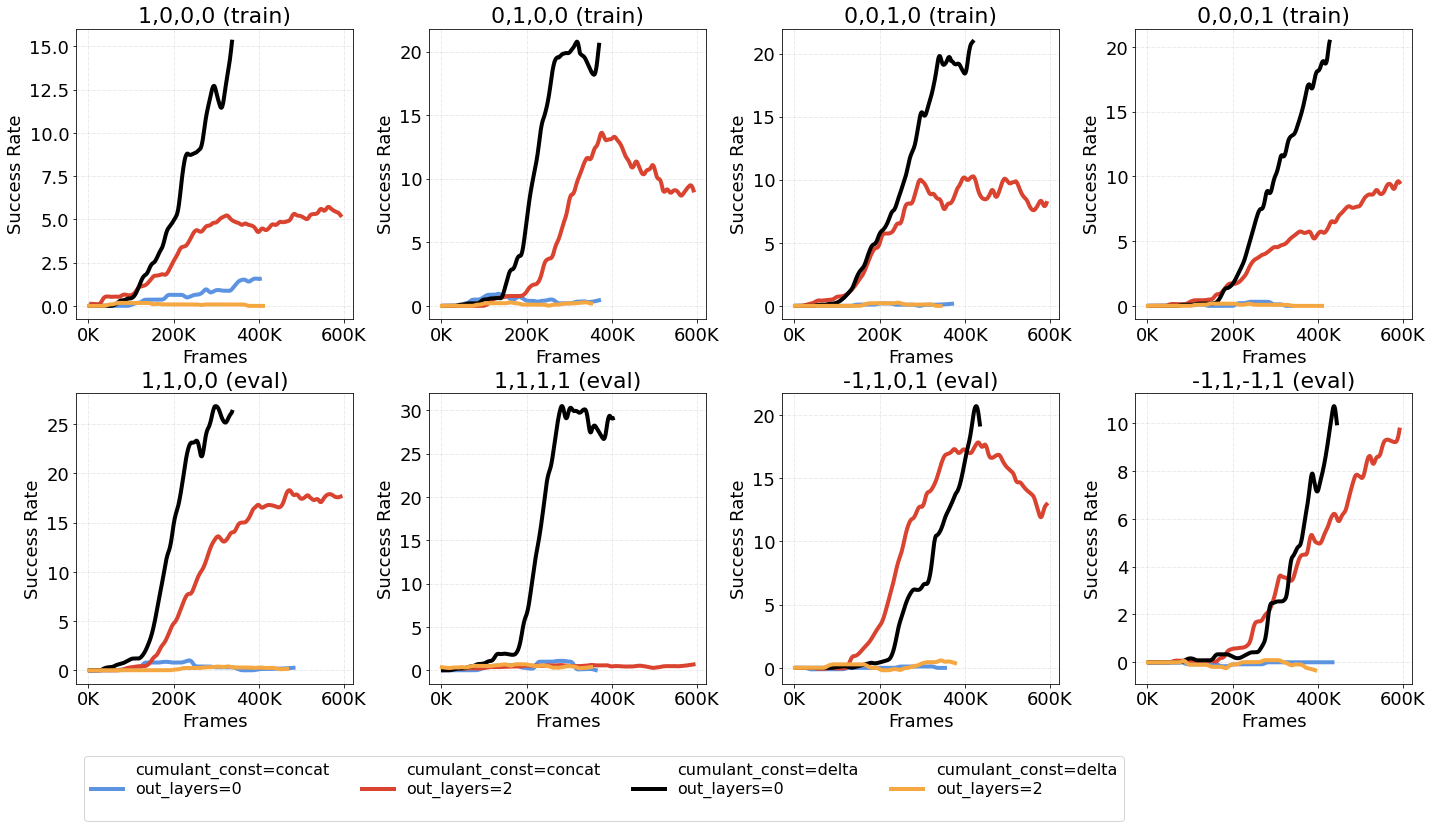

In [9]:
# display(HTML(f"<h1>L2 vs. binary</h1>"))        
import numpy as np

vis_tool.plot_filters(
    topk=1,
    maxcols=4,
    legend_kwargs=dict(
                loc='lower left',
                bbox_to_anchor=(0,-.5), 
                ncol=4,
                ),
    data_filters = [
        dict(
            cumulant_const=None,
            out_layers=None,
        ),
    ],
    plot_data_kwargs=dict(xlabel_key='evaluator/ActorSteps',
                          n_samples=400,
                          rolling=100,
                          xmax=6e5,
                          err_fn=lambda h: h.grouped.sem(),
                          std_alpha=.1,
                          err_style='fill'),
    subplot_kwargs=dict(unit=5),
)

,num_seeds,farm_task_input,farm_policy_task_input
0,2,False,False
1,2,True,False
2,2,False,True
3,2,True,True


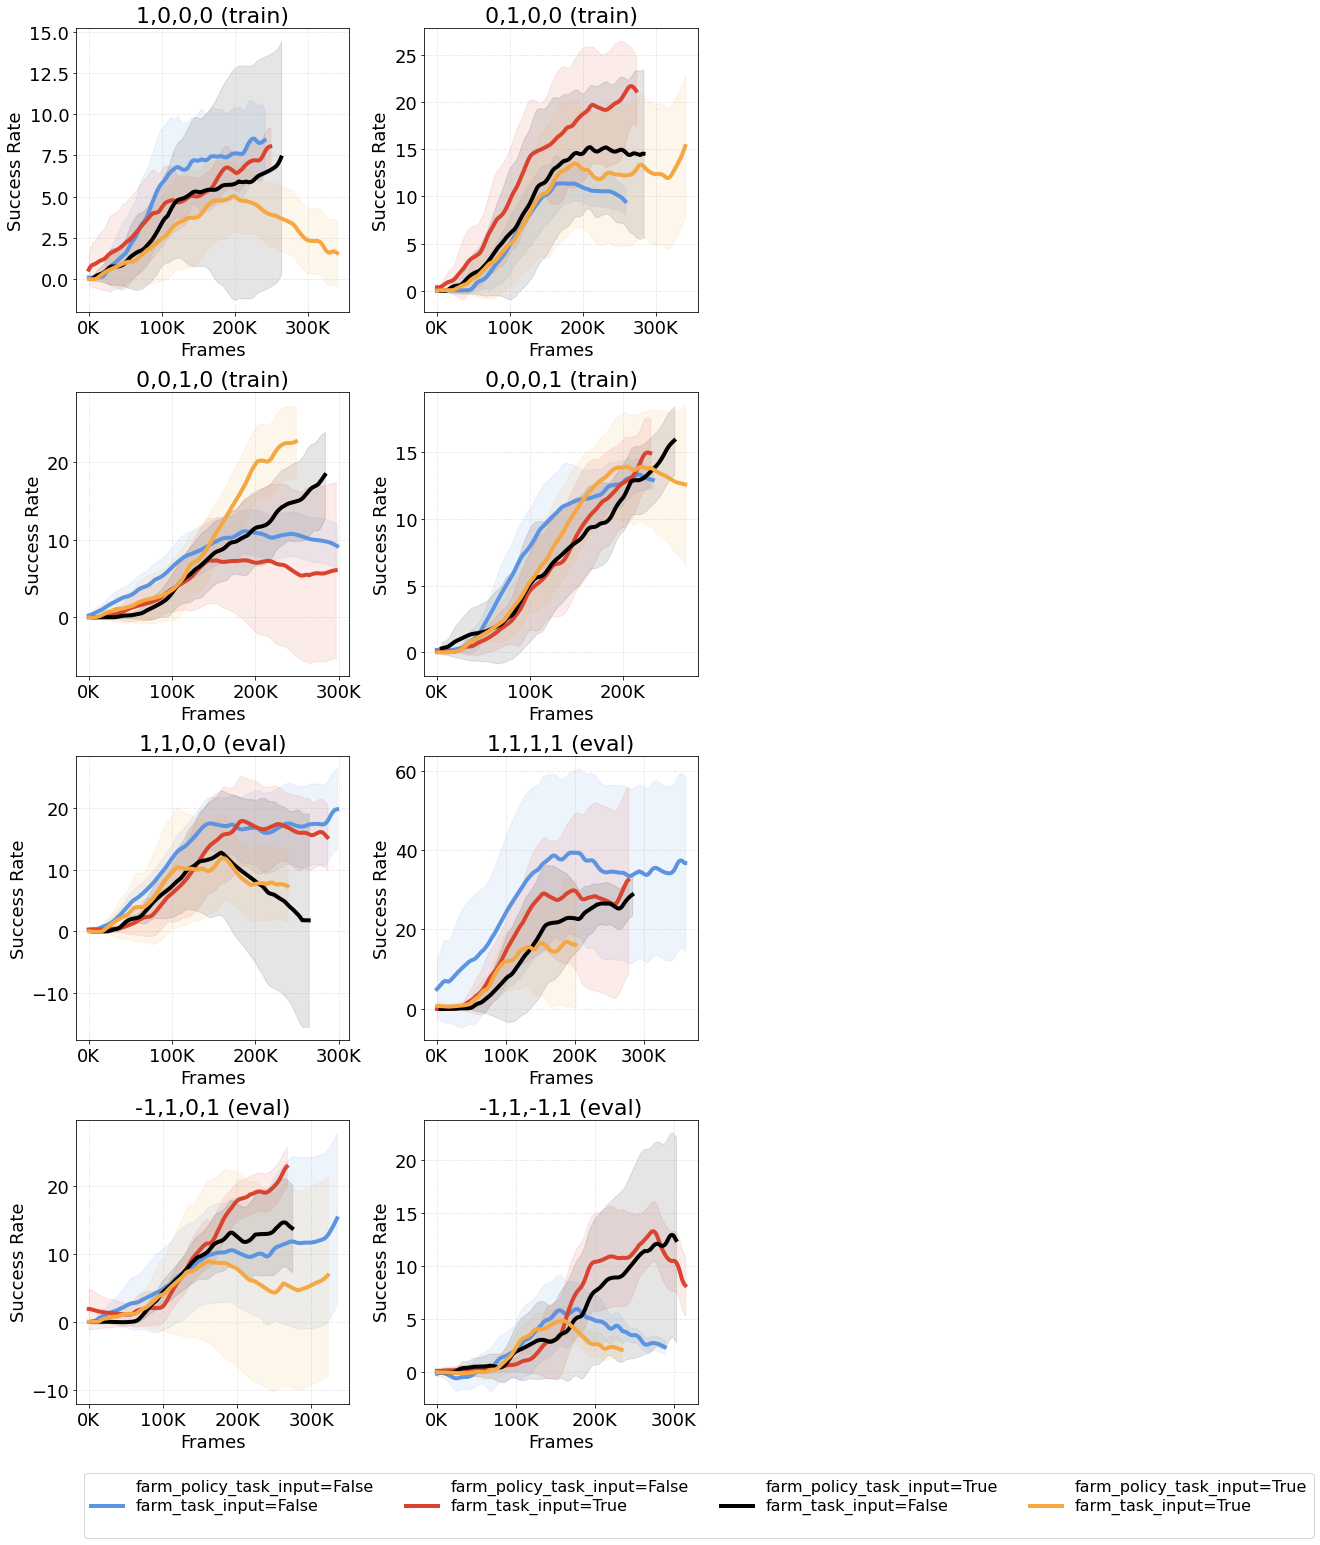

In [11]:
# display(HTML(f"<h1>L2 vs. binary</h1>"))        


vis_tool.plot_filters(
    topk=1,
    maxcols=2,
    legend_kwargs=dict(
                loc='lower left',
                bbox_to_anchor=(0,-.5), 
                ncol=4,
                ),
    data_filters = [
        dict(
            farm_task_input=None,
            farm_policy_task_input=None,
        ),
    ],
    plot_data_kwargs=dict(xlabel_key='evaluator/ActorSteps',
                          n_samples=400,
                          rolling=150,
                          xmax=6e5,
                          std_alpha=.1,
                          err_style='fill'),
    subplot_kwargs=dict(unit=5),
)

,num_seeds,farm_task_input,farm_policy_task_input
0,2,False,False
1,2,True,True


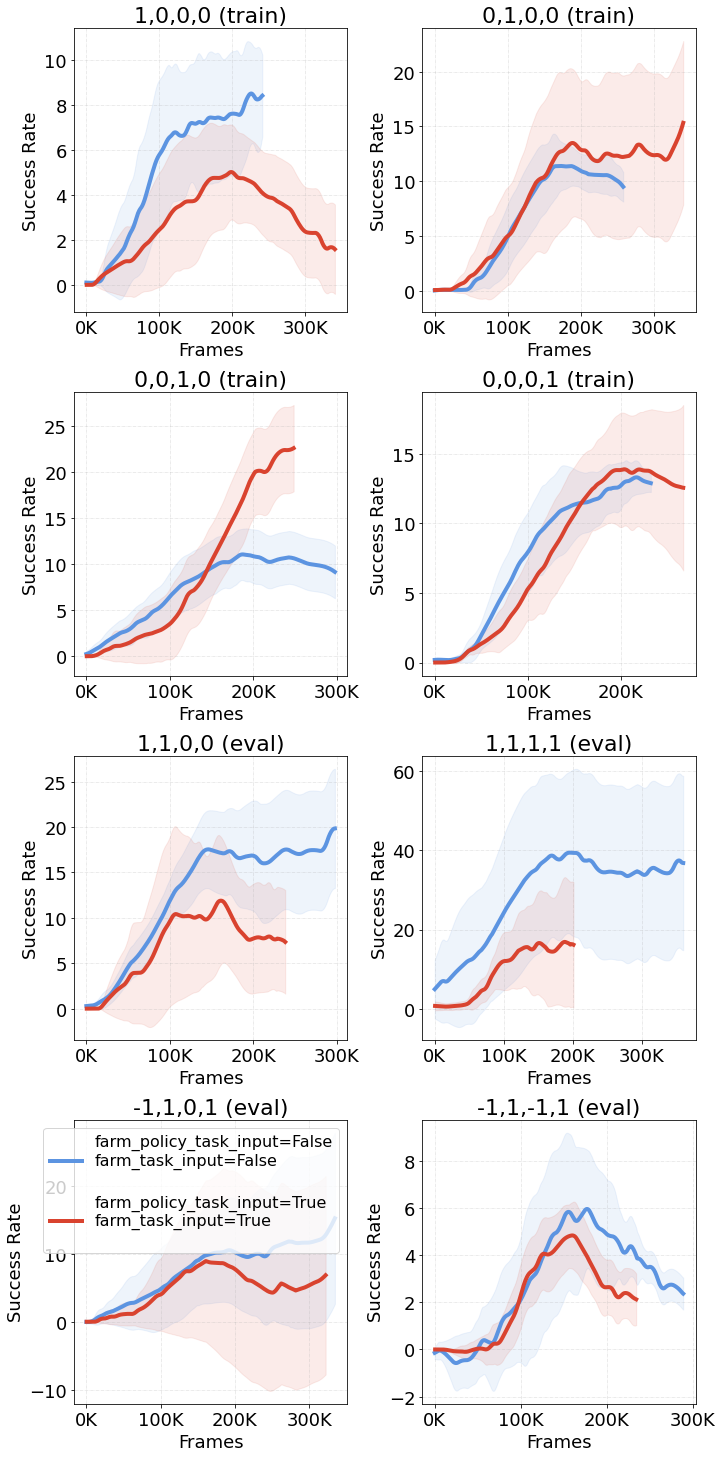

In [13]:
# display(HTML(f"<h1>L2 vs. binary</h1>"))        


vis_tool.plot_filters(
    topk=1,
    maxcols=2,
    # legend_kwargs=dict(
    #             loc='lower left',
    #             bbox_to_anchor=(0,-.5), 
    #             ncol=4,
    #             ),
    data_filters = [
        dict(
            farm_task_input=False,
            farm_policy_task_input=False,
        ),
        dict(
            farm_task_input=True,
            farm_policy_task_input=True,
        ),
    ],
    plot_data_kwargs=dict(xlabel_key='evaluator/ActorSteps',
                          n_samples=400,
                          rolling=150,
                          xmax=6e5,
                          std_alpha=.1,
                          err_style='fill'),
    subplot_kwargs=dict(unit=5),
)